In [12]:
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Lipinski import NumHAcceptors, NumHDonors
from rdkit.Chem.FilterCatalog import FilterCatalogParams, FilterCatalog
# import gym_molecule
import copy
import networkx as nx
from gym_molecule.envs.sascorer import calculateScore
from gym_molecule.dataset.dataset_utils import gdb_dataset,mol_to_nx,nx_to_mol
import random
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import numpy as np
from contextlib import contextmanager
import sys, os
import tensorflow.compat.v1 as tf
import gym_molecule.models.reinvent.model as mm

In [4]:
def read_smi_file(file_path):
    """
    Reads a SMILES file.
    :param file_path: Path to a SMILES file.
    :return: A list with all the SMILES.
    """
    with open(file_path, "r") as smi_file:
        return [smi.rstrip().split(",")[0] for smi in smi_file]

In [5]:
model = mm.Model.load_from_file('/data/data/kcoutinh/Research/rl_graph_generation/gym-molecule/gym_molecule/kev_models/model_zinc_250.78')

In [6]:
dataset = read_smi_file('/data/data/kcoutinh/Research/rl_graph_generation/gym-molecule/gym_molecule/dataset/sampled_smiles_2.smi')

In [7]:
df_org = pd.DataFrame(dataset, columns=['SMILES'])

In [8]:
print(model.likelihood('CCC(C)(C)c1cc(N2CCN(Cc3ccccc3)C(=O)C(C)(C#N)C2)c2c(F)ccc(Cl)c2Cl)cc(OC)c1'))

tensor([-55.7720], grad_fn=<AddBackward>)


In [10]:
for mol in df_org['SMILES']:
    str = mol

print(str)

COc1ccc([C@H](C)[NH2+]C[C@@H](C)SC)c(OC)c1


In [21]:
log_lh = []

for mol in df_org['SMILES']:
    log_lh.append(model.likelihood(mol).item())

In [22]:
df_org['Log_likeli'] = log_lh

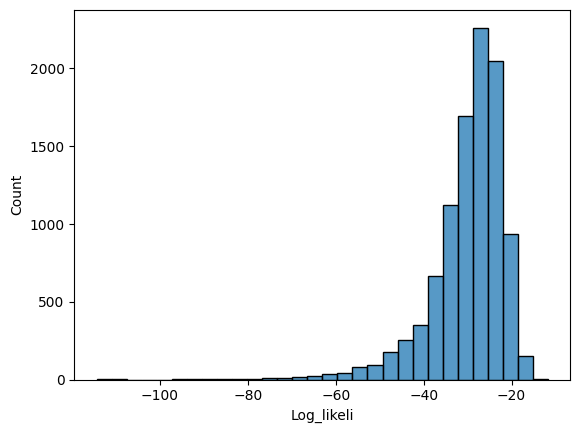

In [23]:
sns.histplot(data = df_org, x ="Log_likeli", bins = 30)
plt.show()